<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Thierry Parmentelat &amp; Arnaud Legout</span>
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

RuntimeError: 'ipympl is not a recognised GUI loop or backend name

# l'ensemble de Mandelbrot

il s'agit de calculer l'image de la convergence de mandelbrot:

<img src="media/mandelbrot.svg">

## comment ça marche ?

* dans l'espace complexe, on définit pour chaque $c\in\mathbb{C}$ la suite
   * $z_0 = c$
   * $z_{n+1} = z_n^2 + c$
* on démontre que 
  * lorsque $|z_n|>2$, la suite diverge

il s'agit pour nous de 

* partir d'un pavé rectangulaire  
  par exemple sur la figure, on a pris l'habituel  
  $re \in [-2, 0.8]$ et  $im \in [-1.4, 1.4]$
* découper ce pavé en un maillage de $w \times h$ points  
  (sur la figure, 1000 x 1000)
* on se fixe un nombre maximal `max` d'itérations (disons 20)
  * et pour chaque point du maillage, on va calculer si la suite diverge avant `max` itérations
* c'est-à-dire plus spécifiquement on calcule un tableau `diverge` de la taille du maillage
  * pour chaque point `z`, on calcule les `max` premiers termes de la suite
  * et à la première itération `n` où la suite diverge (son module est supérieur à 2)  
    alors on affecte `diverge[z] = n`
* on n'a plus qu'à afficher ensuite l'image obtenue avec `plt.imshow`

*indices*

* pour fabriquer la grille des points de départ, 
  on pourra regarder `np.linspace` et `np.meshgrid`

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def suite(couple,c):
    '''Fonction servant à retourner le complexe zn+1 à partir de zn et zo fixé sous forme de tableau 1x2'''
    z1 = np.array([couple[0],couple[1]])
    z2 = np.array([couple[0],-couple[1]]) #Construction du carré de zn
    Re = np.dot(z1,z2) #Renvoie la partie réelle sous forme de produit matriciel
    zc = [Re,2*couple[0]*couple[1]] #La partie imaginaire est de forme 2ab*i
    return(zc+np.array(c)) #On renvoie la somme vectorielle de zn² et de c=zo


def module(z):
    '''Renvoie le module d'un complexe représenté en array de dimension 2'''
    return(np.sqrt(z[0]**2+z[1]**2))


def comptagediv(couple,max,c):
    '''Fonction itérant la relation de récurrence et testant le critère de divergence à chaque itération'''
    compte = 0
    #print(couple)
    while module(couple)<=2: #Tant que ça ne diverge pas on itère
        couple = suite(couple,c)
        compte += 1 #On ajoute 1 au comptage
        if compte == max:
            return(max) #Si la limite d'itération est atteinte sans divergence, la suite a convergé
    return(compte) #On renvoie le nombre d'itérations réalisé

#vcomptagediv = np.vectorize(comptagediv) Ne sert plus depuis un réagencement du script plus lisible ainsi

def mandelbrot(w,h,max,c):
    '''Renvoie le plan complexe discrétisé en tableau de dimension wxh rempli du nombre d'itération réalisé avant divergence pour chaque point'''
    RE = np.linspace(-2,0.8,w) #Création de l'axe des réels
    IM = np.linspace(-1.4,1.4,h) #Création de l'axe des imaginaires
    Plancomplexe = np.meshgrid(RE,IM) #Réalisation du produit cartésien des deux tableaux pour obtenir un tableau de coordonnées du plan complexe
    DIV = np.zeros((h,w))
    #print(Plancomplexe)
    for i in range (w):
        for j in range (h):
            #print([Plancomplexe[0][i,j],Plancomplexe[1][i,j]])
            DIV[i,j] = comptagediv([Plancomplexe[0][i,j],Plancomplexe[1][i,j]],max,c) #On rempli DIV par les bonnées valeurs pour chauqe point
    print(DIV)
    im = plt.imshow(DIV, cmap='hot')
    plt.colorbar(im, orientation='horizontal')
    plt.show()

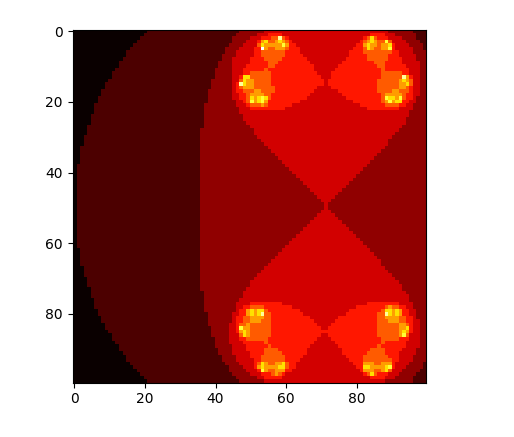
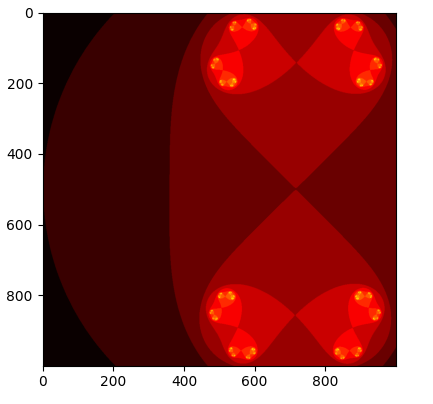

Images issues du premier lancement avec un Z0 = 1 + 0,01*i, Mandelbrot semble bien m'aimer <3 

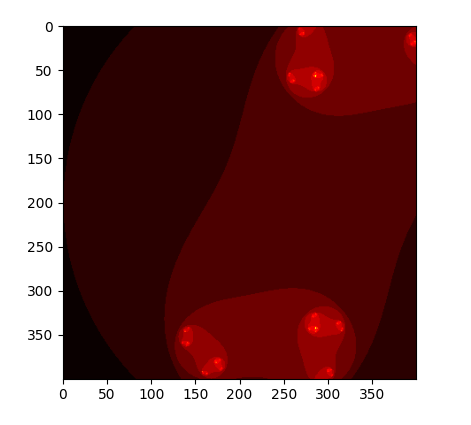
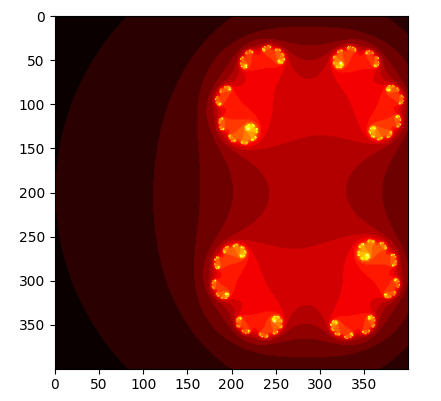

Parce que je suis content et que je trouve ça beau :)

## v2

* on peut passer en paramètre à la fonction
  * le domaine en x et en y
  * le nombre maximum d'itérations
* on veut pouvoir produire une image (pour l'insérer dans l'énoncé par exemple)
  * quels formats sont disponibles ?
  * sauvez votre image dans un format vectoriel
  * affichez cette depuis votre notebook